# Clustering for Kalbe Nutritional Customer Segmentation

# Loading Library and Datasets

In [1]:
# importing library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [2]:
# reading dataset
customers = pd.read_csv('Case Study - Customer.csv', sep =';')
product = pd.read_csv('Case Study - Product.csv', sep =';')
store = pd.read_csv('Case Study - Store.csv', sep =';')
transaction = pd.read_csv('Case Study - Transaction.csv', sep =';')

In [3]:
customers.head()

,CustomerID,Age,Gender,Marital Status,Income
0,1,55,1,Married,"5,12"
1,2,60,1,Married,"6,23"
2,3,32,1,Married,"9,17"
3,4,31,1,Married,"4,87"
4,5,58,1,Married,"3,57"


In [4]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      447 non-null    int64 
 1   Age             447 non-null    int64 
 2   Gender          447 non-null    int64 
 3   Marital Status  444 non-null    object
 4   Income          447 non-null    object
dtypes: int64(3), object(2)
memory usage: 17.6+ KB


In [5]:
product.head()

,ProductID,Product Name,Price
0,P1,Choco Bar,8800
1,P2,Ginger Candy,3200
2,P3,Crackers,7500
3,P4,Potato Chip,12000
4,P5,Thai Tea,4200


In [6]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ProductID     10 non-null     object
 1   Product Name  10 non-null     object
 2   Price         10 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 372.0+ bytes


In [7]:
store.head()

,StoreID,StoreName,GroupStore,Type,Latitude,Longitude
0,1,Prima Tendean,Prima,Modern Trade,"-6,2","106,816666"
1,2,Prima Kelapa Dua,Prima,Modern Trade,"-6,914864","107,608238"
2,3,Prima Kota,Prima,Modern Trade,"-7,797068","110,370529"
3,4,Gita Ginara,Gita,General Trade,"-6,966667","110,416664"
4,5,Bonafid,Gita,General Trade,"-7,250445","112,768845"


In [8]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   StoreID     14 non-null     int64 
 1   StoreName   14 non-null     object
 2   GroupStore  14 non-null     object
 3   Type        14 non-null     object
 4   Latitude    14 non-null     object
 5   Longitude   14 non-null     object
dtypes: int64(1), object(5)
memory usage: 804.0+ bytes


In [9]:
transaction.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
0,TR11369,328,01/01/2022,P3,7500,4,30000,12
1,TR16356,165,01/01/2022,P9,10000,7,70000,1
2,TR1984,183,01/01/2022,P1,8800,4,35200,4
3,TR35256,160,01/01/2022,P1,8800,7,61600,4
4,TR41231,386,01/01/2022,P9,10000,1,10000,4


In [10]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionID  5020 non-null   object
 1   CustomerID     5020 non-null   int64 
 2   Date           5020 non-null   object
 3   ProductID      5020 non-null   object
 4   Price          5020 non-null   int64 
 5   Qty            5020 non-null   int64 
 6   TotalAmount    5020 non-null   int64 
 7   StoreID        5020 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 313.9+ KB


In [11]:
# checking shape
print("customer shape is",customers.shape)
print("product shape is",product.shape)
print("store shape is",store.shape)
print("transaction shape is",transaction.shape)

customer shape is (447, 5)
product shape is (10, 3)
store shape is (14, 6)
transaction shape is (5020, 8)


# Data Preparation

In [12]:
# Merge all table into one

merged_df = pd.merge(transaction, product,on='ProductID', suffixes = ('_customers', '_product'))
merged_df = pd.merge(merged_df, store, on='StoreID')
final_merged_df = pd.merge(merged_df, customers, on='CustomerID')
final_merged_df= final_merged_df.drop(['Price_customers'], axis = 1)
final_merged_df.sample(5)

,TransactionID,CustomerID,Date,ProductID,Qty,TotalAmount,StoreID,Product Name,Price_product,StoreName,GroupStore,Type,Latitude,Longitude,Age,Gender,Marital Status,Income
1061,TR5562,141,06/07/2022,P5,3,12600,7,Thai Tea,4200,Buana Indah,Buana,General Trade,"3,316694","114,590111",65,1,Married,"9,94"
3683,TR88303,109,12/02/2022,P8,1,16000,1,Oat,16000,Prima Tendean,Prima,Modern Trade,"-6,2","106,816666",35,1,Married,"10,04"
3537,TR33274,446,28/02/2022,P4,2,24000,11,Potato Chip,12000,Sinar Harapan,Prestasi,General Trade,"0,533505","101,447403",57,0,Married,"7,81"
4038,TR90458,37,09/03/2022,P5,3,12600,2,Thai Tea,4200,Prima Kelapa Dua,Prima,Modern Trade,"-6,914864","107,608238",51,0,Married,"17,11"
438,TR78116,123,29/04/2022,P3,3,22500,3,Crackers,7500,Prima Kota,Prima,Modern Trade,"-7,797068","110,370529",34,0,Married,"4,36"


In [13]:
# rename all column to lowercase and drop irrelevant column in table
for column in final_merged_df.columns:
    final_merged_df.rename(columns ={column: column.lower()}, inplace = True)
final_merged_df.rename(columns = {'marital status': 'marital_status'}, inplace = True)
final_merged_df.rename(columns = {'product name': 'product_name'}, inplace = True)
final_merged_df.sample(5)

# drop irrelevant column and change data type
df = final_merged_df.drop(['latitude', 'longitude'], axis=1)
df['date'] = pd.to_datetime(df['date'],format='%d/%m/%Y', infer_datetime_format=True)
df.sample(5)

,transactionid,customerid,date,productid,qty,totalamount,storeid,product_name,price_product,storename,groupstore,type,age,gender,marital_status,income
4859,TR5564,290,2022-05-02,P10,1,15000,9,Cheese Stick,15000,Lingga,Lingga,Modern Trade,19,1,Single,"0,98"
1041,TR87564,19,2022-01-27,P9,3,30000,14,Yoghurt,10000,Priangan,Priangan,Modern Trade,24,1,Single,"4,14"
1873,TR95917,404,2022-07-27,P1,4,35200,6,Choco Bar,8800,Lingga,Lingga,Modern Trade,22,0,Single,"2,69"
689,TR16690,353,2022-08-29,P5,5,21000,6,Thai Tea,4200,Lingga,Lingga,Modern Trade,25,0,Single,"1,32"
2574,TR9366,250,2022-04-28,P5,4,16800,2,Thai Tea,4200,Prima Kelapa Dua,Prima,Modern Trade,30,1,Married,"3,96"


In [14]:
# check dataframe info and shape
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5020 entries, 0 to 5019
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transactionid   5020 non-null   object        
 1   customerid      5020 non-null   int64         
 2   date            5020 non-null   datetime64[ns]
 3   productid       5020 non-null   object        
 4   qty             5020 non-null   int64         
 5   totalamount     5020 non-null   int64         
 6   storeid         5020 non-null   int64         
 7   product_name    5020 non-null   object        
 8   price_product   5020 non-null   int64         
 9   storename       5020 non-null   object        
 10  groupstore      5020 non-null   object        
 11  type            5020 non-null   object        
 12  age             5020 non-null   int64         
 13  gender          5020 non-null   int64         
 14  marital_status  4976 non-null   object        
 15  inco

(5020, 16)

In [15]:
# checking null values
df.isna().sum()

transactionid      0
customerid         0
date               0
productid          0
qty                0
totalamount        0
storeid            0
product_name       0
price_product      0
storename          0
groupstore         0
type               0
age                0
gender             0
marital_status    44
income             0
dtype: int64

In [16]:
# fill null values with mode method
mode_marital_status = df['marital_status'].mode()[0]
df['marital_status'].fillna(mode_marital_status, inplace = True)
df.isna().sum()

transactionid     0
customerid        0
date              0
productid         0
qty               0
totalamount       0
storeid           0
product_name      0
price_product     0
storename         0
groupstore        0
type              0
age               0
gender            0
marital_status    0
income            0
dtype: int64

# Clustering Using KMeans Method

In [17]:
# make new dataframe for clustering
cluster_df = df.groupby('customerid').agg({'transactionid' : 'count',
                                          'qty' : 'sum',
                                          'totalamount' : 'sum'})
cluster_df.head()

,transactionid,qty,totalamount
customerid,,,
1,17,60,623300
2,13,57,392300
3,15,56,446200
4,10,46,302500
5,7,27,268600


# Checking Data Outlier

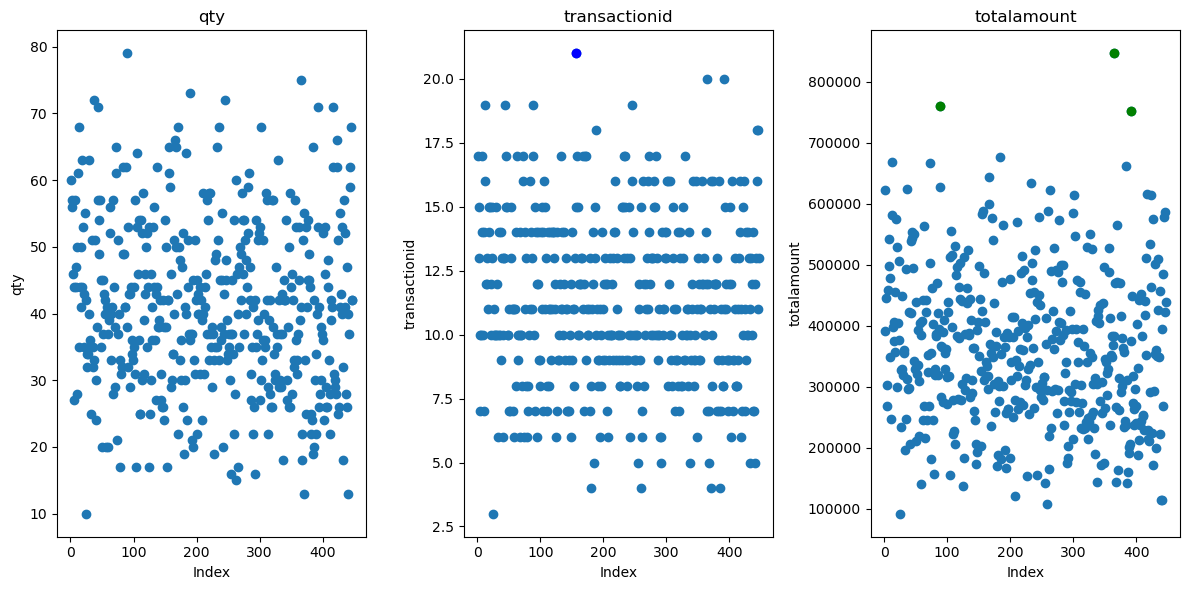

In [18]:
# Calculate Z-score for each data point
numeric_cols = ['transactionid', 'qty', 'totalamount']
z_scores = np.abs((cluster_df[numeric_cols] - cluster_df[numeric_cols].mean()) / cluster_df[numeric_cols].std())

# Define a threshold for outliers
outlier_threshold = 3

# Identify outliers
outliers = cluster_df[z_scores > outlier_threshold]

# Plot the data
plt.figure(figsize=(12, 6))

# Plot for 'qty'
plt.subplot(1, 3, 1)
plt.scatter(cluster_df.index, cluster_df['qty'], label='qty')
plt.scatter(outliers.index, outliers['qty'], color='red', label='Outliers (qty)')
plt.xlabel('Index')
plt.ylabel('qty')
plt.title('qty')

# Plot for 'transactionid'
plt.subplot(1, 3, 2)
plt.scatter(cluster_df.index, cluster_df['transactionid'], label='transactionid')
plt.scatter(outliers.index, outliers['transactionid'], color='blue', label='Outliers (transactionid)')
plt.xlabel('Index')
plt.ylabel('transactionid')
plt.title('transactionid')

# Plot for 'totalamount'
plt.subplot(1, 3, 3)
plt.scatter(cluster_df.index, cluster_df['totalamount'], label='totalamount')
plt.scatter(outliers.index, outliers['totalamount'], color='green', label='Outliers (totalamount)')
plt.xlabel('Index')
plt.ylabel('totalamount')
plt.title('totalamount')

plt.tight_layout()
plt.show()

Dapat menampilkan bahwa tidak ada outlier yang terlalu banyak dan signifikan maka dari itu tidak perlu diproses lebih lanjut.

# Elbow Method

In [19]:
# Standardize the Data
# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the data in cluster_df
cluster_df_std = scaler.fit_transform(cluster_df.values)

# Convert the standardized data back to a DataFrame
cluster_df_std = pd.DataFrame(cluster_df_std, columns=cluster_df.columns)

# check the cluster_df_std data
cluster_df_std.head()

,transactionid,qty,totalamount
0,1.779816,1.496527,2.094768
1,0.545884,1.261093,0.239269
2,1.162850,1.182615,0.672218
3,-0.379565,0.397833,-0.482047
4,-1.305014,-1.093251,-0.754347


In [20]:
# check null values
cluster_df_std.isnull().sum()

transactionid    0
qty              0
totalamount      0
dtype: int64

C:\Users\Rey\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Rey\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Rey\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Rey\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with M

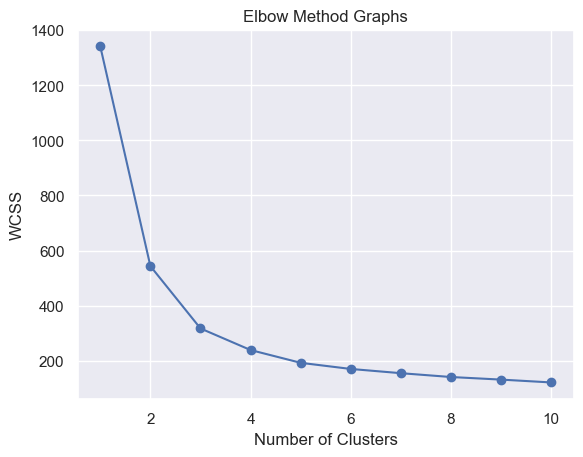

In [21]:
# plot the elbow method to get best number of clusters
wcss = [] # wcss is Within Cluster of Sum Squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init = 10)
    kmeans.fit(cluster_df_std.values)
    wcss.append(kmeans.inertia_)

# plot the elbow method
sns.set()
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method Graphs')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Data menampilkan bahwa clusters KMeans terbaik adalah di n = 3

# KMeans Model Segmentation

In [22]:
# make KMeans with n = 3
kmeans_3 = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0, n_init = 10)
clusters = kmeans_3.fit_predict(cluster_df_std)
cluster_df['cluster'] = clusters

# Display the DataFrame with the cluster labels
cluster_df.head()

C:\Users\Rey\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


,transactionid,qty,totalamount,cluster
customerid,,,,
1,17,60,623300,1
2,13,57,392300,1
3,15,56,446200,1
4,10,46,302500,2
5,7,27,268600,0


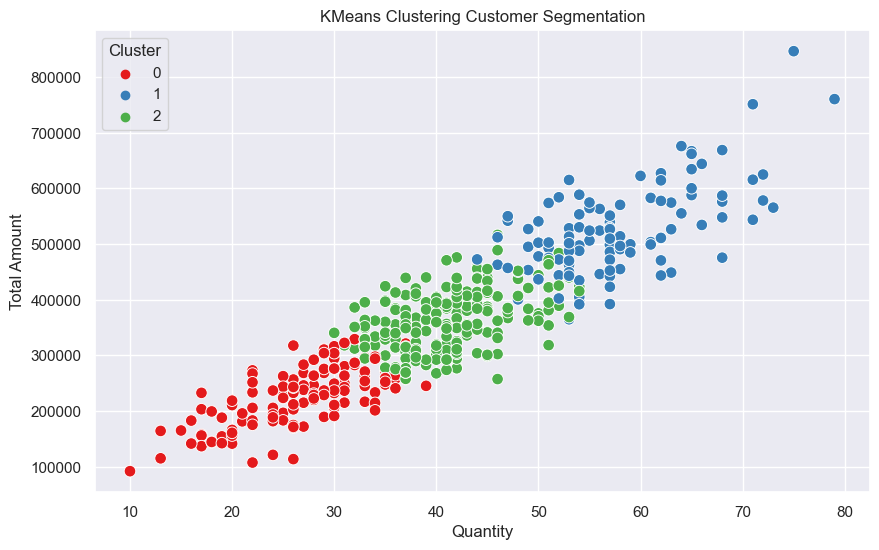

In [23]:
# Convert 'cluster' column to categorical data type
cluster_df['cluster'] = cluster_df['cluster'].astype('category')

# Create the scatter plot using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='qty', y='totalamount', data=cluster_df, hue='cluster', palette='Set1', s=70)
plt.xlabel('Quantity')
plt.ylabel('Total Amount')
plt.title('KMeans Clustering Customer Segmentation')
plt.legend(title='Cluster')
plt.show()

Berdasarkan segmentasi pelanggan dengan 3 klaster, kita dapat melakukan segmentasi pada setiap klaster untuk promosi dan perlakuan penjualan yang lebih personal.

Pertama kita akan melihat pengelompokan KMeans berdasarkan kuantitas dan jumlah total untuk setiap cluster

1. Cluster 0 adalah pelanggan baru
2. Cluster 1 adalah pelanggan setia
3. Cluster 2 adalah pelanggan setia potensial

         transactionid        qty    totalamount
cluster                                         
0             7.785185  26.933333  229388.888889
1            15.363636  57.636364  524504.545455
2            11.282178  41.188119  363267.326733


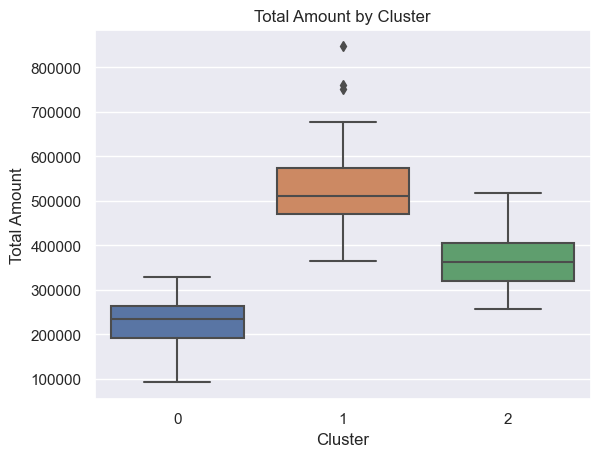

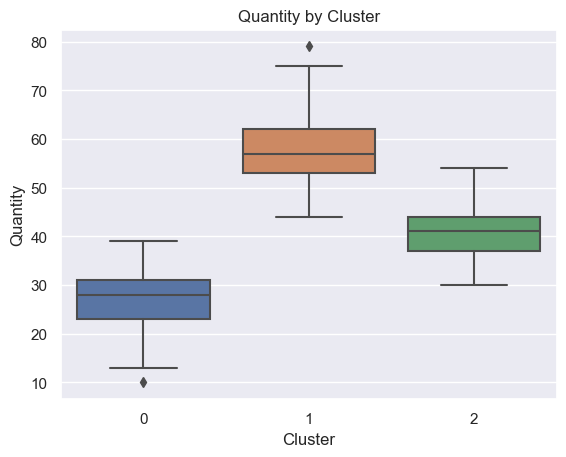

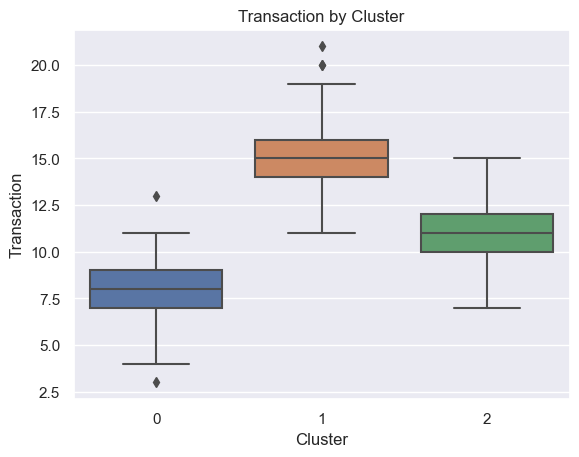

In [24]:
# checking cluster mean
cluster_mean = cluster_df.groupby('cluster').mean()
print(cluster_mean)

# Box Plot for total amount
sns.boxplot(data=cluster_df, x='cluster', y='totalamount')
plt.title('Total Amount by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Total Amount')
plt.show()

# Box Plot for Quantity
sns.boxplot(data=cluster_df, x='cluster', y='qty')
plt.title('Quantity by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Quantity')
plt.show()

# Box Plot for Transaction
sns.boxplot(data=cluster_df, x='cluster', y='transactionid')
plt.title('Transaction by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Transaction')
plt.show()

# RFM Analysis for Customer Segmentation

In [25]:
# create rfm dataframe
rfm_df = df.groupby('customerid').agg({'transactionid' : 'count',
                                          'qty' : 'sum',
                                          'totalamount' : 'sum',
                                       'date' : 'min'})
# check rfm dataframe info
rfm_df.info()
rfm_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 447 entries, 1 to 447
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionid  447 non-null    int64         
 1   qty            447 non-null    int64         
 2   totalamount    447 non-null    int64         
 3   date           447 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(3)
memory usage: 17.5 KB


,transactionid,qty,totalamount,date
customerid,,,,
1,17,60,623300,2022-02-23
2,13,57,392300,2022-01-15
3,15,56,446200,2022-01-25
4,10,46,302500,2022-02-18
5,7,27,268600,2022-02-10


In [26]:
# Calculate Recency
max_date = rfm_df['date'].max()
rfm_df['Recency'] = max_date - rfm_df['date']

# Calculate Frequency
frequency_df = rfm_df.groupby('customerid')['transactionid'].unique().reset_index()
frequency_df = frequency_df.rename(columns={'transactionid': 'Frequency'})
rfm_df = rfm_df.merge(frequency_df, on='customerid')
rfm_df['Frequency'] = rfm_df['Frequency'].astype(int)

# Calculate Monetary
monetary_df = rfm_df.groupby('customerid')['totalamount'].sum().reset_index()
monetary_df = monetary_df.rename(columns={'totalamount': 'Monetary'})
rfm_df = rfm_df.merge(monetary_df, on='customerid')
rfm_df['cluster'] = clusters
rfm_df['cluster'] = rfm_df['cluster'].astype('category')

In [27]:
# Group by cluster and calculate average RFM values for each cluster
rfm_analysis = rfm_df.groupby('cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'customerid': 'count'
}).reset_index()

# Rename column
rfm_analysis = rfm_analysis.rename(columns={
    'Recency': 'Average Recency',
    'Frequency': 'Average Frequency',
    'Monetary': 'Average Monetary',
    'customerid': 'Customer Count'
})
# Convert timedeltas to numeric values in days
rfm_analysis['Average Recency'] = rfm_analysis['Average Recency'].dt.days

# Display the RFM analysis for each cluster
rfm_analysis.head()

,cluster,Average Recency,Average Frequency,Average Monetary,Customer Count
0,0,176,7.785185,229388.888889,135
1,1,200,15.363636,524504.545455,110
2,2,193,11.282178,363267.326733,202


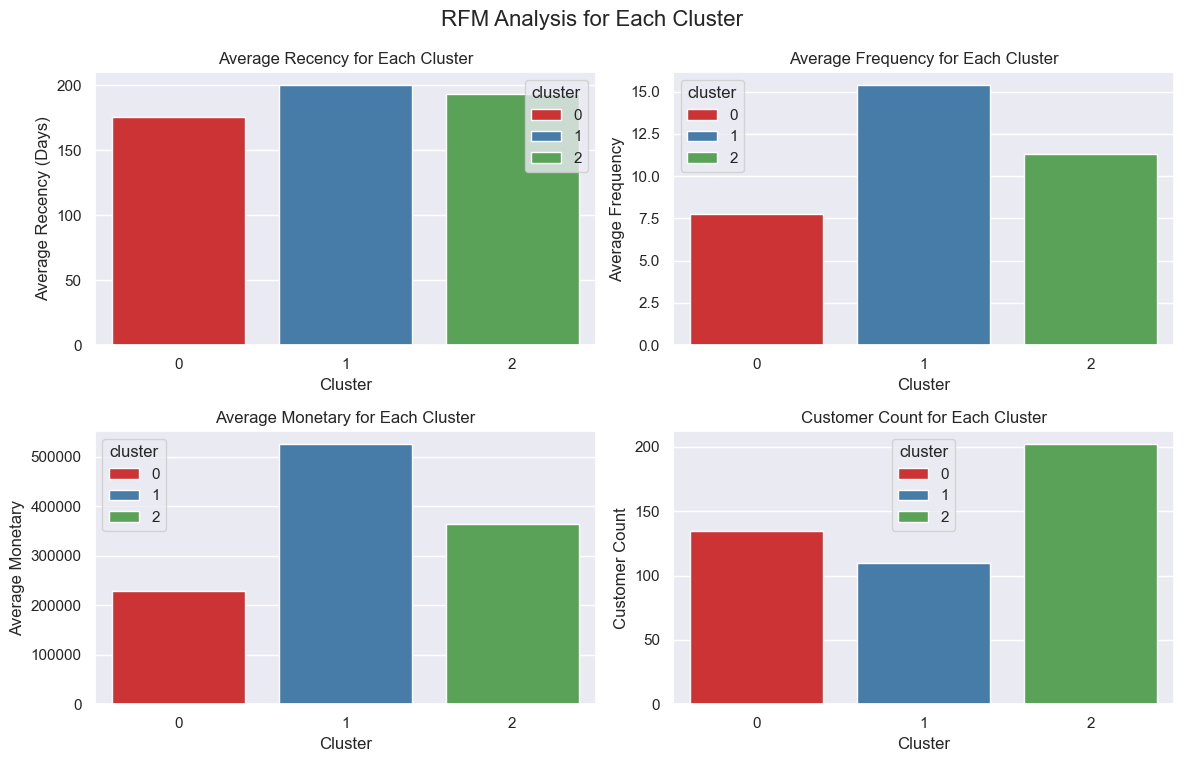

In [28]:
# Create a subplot with 2 rows and 2 columns
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Plot the average Recency for each cluster
sns.barplot(x='cluster', y='Average Recency', data=rfm_analysis, hue='cluster', palette='Set1', dodge=False, ax=axes[0, 0])
axes[0, 0].set_title('Average Recency for Each Cluster')
axes[0, 0].set_xlabel('Cluster')
axes[0, 0].set_ylabel('Average Recency (Days)')

# Plot the average Frequency for each cluster
sns.barplot(x='cluster', y='Average Frequency', data=rfm_analysis, hue='cluster', palette='Set1', dodge=False, ax=axes[0, 1])
axes[0, 1].set_title('Average Frequency for Each Cluster')
axes[0, 1].set_xlabel('Cluster')
axes[0, 1].set_ylabel('Average Frequency')

# Plot the average Monetary for each cluster
sns.barplot(x='cluster', y='Average Monetary', data=rfm_analysis, hue='cluster', palette='Set1', dodge=False, ax=axes[1, 0])
axes[1, 0].set_title('Average Monetary for Each Cluster')
axes[1, 0].set_xlabel('Cluster')
axes[1, 0].set_ylabel('Average Monetary')

# Plot the customer count for each cluster
sns.barplot(x='cluster', y='Customer Count', data=rfm_analysis, hue='cluster', palette='Set1', dodge=False, ax=axes[1, 1])
axes[1, 1].set_title('Customer Count for Each Cluster')
axes[1, 1].set_xlabel('Cluster')
axes[1, 1].set_ylabel('Customer Count')

# Adjust the layout to avoid overlapping titles
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Add a common title for the entire subplot
fig.suptitle('RFM Analysis for Each Cluster', fontsize=16)

# Show the plots
plt.show()

Dengan menggunakan Analisis RFM untuk setiap klaster, kami dapat menyimpulkan bahwa

1. Cluster 0

- Rata-rata Keterkinian Terendah
- Rata-rata Frekuensi Terendah
- Rata-rata Moneter Terendah
- Jumlah Pelanggan Sedang

2. Cluster 1

- Rata-rata Keterkinian Tertinggi
- Frekuensi Rata-rata Tertinggi
- Rata-rata Moneter Tertinggi
- Jumlah Pelanggan Terendah

3. Cluster 2

- Rata-rata Frekuensi Kunjungan Sedang
- Frekuensi Rata-rata Sedang
- Rata-rata Moneter Sedang
- Jumlah Pelanggan Tertinggi

Jadi kita dapat menyimpulkan bahwa setiap cluster memiliki karakteristik yang berbeda dan kita dapat membuat promosi dan perlakuan penjualan yang dipersonalisasi seperti ini.

1. Cluster 0 adalah pelanggan yang mungkin membutuhkan insentif untuk terlibat kembali dengan merek kita.
* Strategi yang dapat digunakan
- Berikan Diskon Ekstra
- Memberikan keuntungan ekstra setelah pembelian produk seperti gratis ongkos kirim
- Promosi yang dipersonalisasi

2. Cluster 1 adalah pelanggan yang berharga bagi bisnis kita dan harus ditargetkan dengan penawaran eksklusif untuk mempertahankan loyalitas.
* Strategi yang dapat digunakan
- Berikan Penawaran Eksklusif kepada Loyalitas
- Berikan Program dan Manfaat Loyalitas
- Akses Awal ke Produk dan Diskon Khusus

3. Cluster 2 adalah pelanggan yang memiliki potensi untuk melakukan upselling, karena mereka sudah membeli sesekali.
* Strategi yang dapat digunakan
- Penawaran Bundel
- Menawarkan Program Loyalitas dengan Berbagai Manfaat
- Diskon Khusus